In [2]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt



Text(0.5, 1.0, 'Original data')

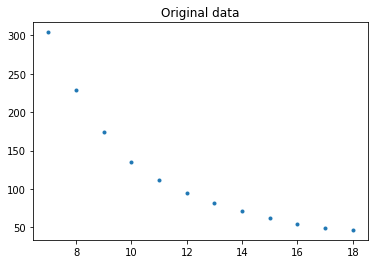

In [7]:
xs = np.arange(12) + 7
ys = np.array([304.08994, 229.13878, 173.71886, 135.75499,
               111.096794, 94.25109, 81.55578, 71.30187, 
               62.146603, 54.212032, 49.20715, 46.765743])

plt.plot(xs, ys, '.')
plt.title("Original data")

In [8]:
def monoExp(x, m, t, b):
    return m * np.exp(-t *x) + b

In [10]:
# perform the fit
p0 = (2000, .1, 50)
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
m, t, b = params
sampleRate = 20_000
tauSec = ( 1 / t) / sampleRate



In [11]:
# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

R² = 0.999107330342064


Text(0.5, 1.0, 'Fitted Exponential Curve')

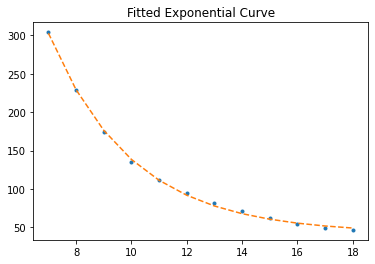

In [12]:
# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
plt.title("Fitted Exponential Curve")

In [13]:
# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
print(f"Tau = {tauSec * 1e6} µs")

Y = 2666.4986203790436 * e^(-0.3323976124249072 * x) + 42.494207736843315
Tau = 150.42225976065228 µs


Text(0.5, 1.0, 'Extrapolated Exponential Curve')

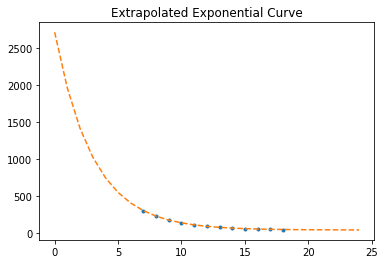

In [14]:
xs2 = np.arange(25)
ys2 = monoExp(xs2, m, t, b)

plt.plot(xs, ys, '.', label="data")
plt.plot(xs2, ys2, '--', label="fitted")
plt.title("Extrapolated Exponential Curve")